Hello, This is IGBO Corpus Builder. You will need to run each cell to generate Corpus and get results for some code examples.

The IGBO corpus files will be visible on the left hand side under the folder Menu. All the textual files are stored here: https://github.com/Stan-Atajan-Cyberteam-NSF/Igbo_Corpora

In [ ]:
#Run to load necessary libraries
import nltk
from nltk.text import Text

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('gutenberg')
from nltk import ngrams
import matplotlib.pyplot as plt
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from wordcloud import WordCloud
from collections import Counter
from nltk import FreqDist
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


#Creating IGBO CORPUS

In [ ]:
#@title Corpus Creator
import urllib.request
import nltk
import os
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import requests

import urllib.request
import nltk
import os
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import requests
 

# create a new corpus directory Igbo
corpus_root = '/content/Igbo'
nltk.data.path.append(corpus_root)

#our main subfolders under Igbo folder
general_genres = ['folklore_stories', 'government', 'bbc_news','bible_books']

# create subdirectories for each genre
for genre in general_genres:
    genre_path = os.path.join(corpus_root, genre)
    if not os.path.exists(genre_path):
        os.makedirs(genre_path)



# text files that contain urls of corpora urls 
bible_books_urls = "https://raw.githubusercontent.com/Stan-Atajan-Cyberteam-NSF/Igbo_Corpora/main/Corpus/Bible_books.txt"
folklore_stories_urls = "https://raw.githubusercontent.com/Stan-Atajan-Cyberteam-NSF/Igbo_Corpora/main/Corpus/folklore_stories.txt"
government_urls = 'https://raw.githubusercontent.com/Stan-Atajan-Cyberteam-NSF/Igbo_Corpora/main/Corpus/govt_docs.txt'
bbc_news_urls = 'https://raw.githubusercontent.com/Stan-Atajan-Cyberteam-NSF/Igbo_Corpora/main/Corpus/bbc_links.txt'


#get bible books urls 
response = requests.get(bible_books_urls)
url_list = response.content.decode().split("\n")
bible_books_urls2 = [url.replace('\r', '') for url in url_list]
#get folklore stories' urls
response = requests.get(folklore_stories_urls)
url_list = response.content.decode().split("\n")
folklore_stories_urls2 = [url.replace('\r', '') for url in url_list]
#get government files urls
response = requests.get(government_urls)
url_list = response.content.decode().split("\n")
government_urls2 = [url.replace('\r', '') for url in url_list]
#get bbc news urls
response = requests.get(bbc_news_urls)
url_list = response.content.decode().split("\n")
bbc_news_urls2 = [url.replace('\r', '') for url in url_list]


#get copy text and create a txt file from urls
def corpora_creator(corpora_urls,genre): #corpora urls is urls for each corpora, genre is which subcorpus to put files in
  for i, url in enumerate(corpora_urls):
      # get the filename from the url after the 7th / character
      filename = url.split('/')[-1]
      # remove the file extension from the filename
      filename = os.path.splitext(filename)[0]
      # get the first alpha word from the filename
      filename = f'{"".join(filter(str.isalpha, corpora_urls[i].split("/")[-1].split(".")[0]))}'
 #filename = ''.join(filter(str.isalpha, filename))
      with urllib.request.urlopen(url) as response:
          text = response.read().decode().split('\n')
          with open(os.path.join(corpus_root, genre, f'{filename}.txt'), 'w') as file:
              file.write('\n'.join(text))

#apply function above, also if errors, add this: bbc_news_urls2 = [url for url in bbc_news_urls2 if url.strip()] 
corpora_creator(folklore_stories_urls2,general_genres[0]) #to put in folklore stores
corpora_creator(bbc_news_urls2, general_genres[2]) #to put in the bbc news
corpora_creator(bible_books_urls2, general_genres[3]) #to put in the bible books
corpora_creator(government_urls2, general_genres[1]) #to put in the government

## Converting to Corpus file and printing existing corporas

In [ ]:
from nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader
#create the root folder
corpus_root = '/content/Igbo'

# create a CategorizedPlaintextCorpusReader
IGBO = CategorizedPlaintextCorpusReader(corpus_root, r'.*\.txt', cat_pattern=r'([\w_]+)/.*')
#to count sentences
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
#to store each genres words and sentences
df = pd.DataFrame(columns=['genre', 'num_words', 'num_sentences'])

# print fileids and genres
for genre in IGBO.categories():
    print(f"\n{genre}:\n{IGBO.fileids(categories=genre)}")

#store number of words and sentences for each genre
for genre in IGBO.categories():

    # Get the list of files for this genre

    fileids = IGBO.fileids(categories=genre)

    # Initialize counters for this genre
    num_words = 0
    num_sentences = 0

    # Loop over the files for this genre
    for fileid in fileids:
        # Load the file content
        content = IGBO.raw(fileids=[fileid])

        # Tokenize the sentences and count them
        sentences = tokenizer.tokenize(content)
        num_sentences += len(sentences)

        # Tokenize the words and count them
        words = nltk.word_tokenize(content)
        num_words += len(words)

    # Store the results for this genre in the dataframe
    df = df.append({'genre': genre, 'num_words': num_words, 'num_sentences': num_sentences}, ignore_index=True)

# Print the dataframe
#print(df)



bbc_news:
['bbc_news/akuko.txt', 'bbc_news/egwuregwu.txt']

bible_books:
['bible_books/BookofAbuakwa.txt', 'bible_books/BookofAbunkeabu.txt', 'bible_books/BookofAbuoma.txt', 'bible_books/BookofAisaia.txt', 'bible_books/BookofDaniel.txt', 'bible_books/BookofDeuteronomi.txt', 'bible_books/BookofEklisiastis.txt', 'bible_books/BookofEmos.txt', 'bible_books/BookofEsta.txt', 'bible_books/BookofEzikiel.txt', 'bible_books/BookofEzra.txt', 'bible_books/BookofFailimon.txt', 'bible_books/BookofHabakuk.txt', 'bible_books/BookofHagai.txt', 'bible_books/BookofHosea.txt', 'bible_books/BookofIlu.txt', 'bible_books/BookofJemes.txt', 'bible_books/BookofJenesis.txt', 'bible_books/BookofJeremaia.txt', 'bible_books/BookofJob.txt', 'bible_books/BookofJoel.txt', 'bible_books/BookofJon.txt', 'bible_books/BookofJona.txt', 'bible_books/BookofJoshua.txt', 'bible_books/BookofJud.txt', 'bible_books/BookofLevitikos.txt', 'bible_books/BookofLuk.txt', 'bible_books/BookofMaika.txt', 'bible_books/BookofMaitu.txt', 'bi

<ipython-input-3-4863e1f7eb5d>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'genre': genre, 'num_words': num_words, 'num_sentences': num_sentences}, ignore_index=True)
<ipython-input-3-4863e1f7eb5d>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'genre': genre, 'num_words': num_words, 'num_sentences': num_sentences}, ignore_index=True)
<ipython-input-3-4863e1f7eb5d>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'genre': genre, 'num_words': num_words, 'num_sentences': num_sentences}, ignore_index=True)
<ipython-input-3-4863e1f7eb5d>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

### Examples to run

In [ ]:
#some dataframe examples
df['total_words'] = df['num_words'].sum()
df['total_sents'] = df['num_sentences'].sum()
#print('Total Words: ',df['total_words'][0])
#print('Total Sentences: ',df['total_sents'][0])
df

,genre,num_words,num_sentences,total_words,total_sents
0,bbc_news,354800,14265,1227620,44217
1,bible_books,806453,27544,1227620,44217
2,folklore_stories,13861,952,1227620,44217
3,government,52506,1456,1227620,44217


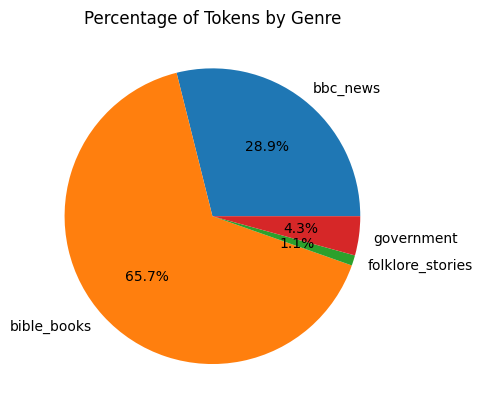

In [ ]:
#@title plot genres
import matplotlib.pyplot as plt

# create a list of genre labels
labels = df['genre'].tolist()

# calculate the percentage of num_words for each genre
percentages = (df['num_words'] / df['total_words']) * 100

# create a pie chart
plt.pie(percentages, labels=labels, autopct='%1.1f%%')

# add a title to the chart
plt.title('Percentage of Tokens by Genre')

# show the chart
plt.show()

In [ ]:
#@title print sentences of akuko corpus
print(IGBO.sents('bbc_news/akuko.txt'))


[['Ndị', 'na', '-', 'ere', 'ngwa', 'nri', 'akwaala', 'arịrị', 'njọahịa', 'na', '-', 'eme', 'n', "'", 'ihi', 'ụkọ', 'ego', 'ọhụrụ', 'dị', 'na', 'Naịjirịa', 'ugbua', '.'], ['Esemokwu', 'na', 'ịgba', 'akwụkwọ', 'ka', 'na', '-', 'arị', 'ibe', 'ya', 'elu', 'dịka', 'a', 'na', '-', 'akwado', 'ịzọ', 'ọkwa', 'Gọvanọ', 'na', 'ntuliaka', 'na', '-', 'abịa', '.'], ...]


In [ ]:
#print akuko corpus words
print(IGBO.words('bbc_news/akuko.txt'))
  

['Ndị', 'na', '-', 'ere', 'ngwa', 'nri', 'akwaala', ...]


In [ ]:
#@title A sample way to export list of unique words from akuko corpus
#import pandas as pd
#words = IGBO.words('bbc_news/akuko.txt')
#words = list(set([word.lower() for word in words if word.isalpha()]))

#akuko_words = pd.DataFrame({'akuko_words':words})
#akuko_words.to_csv('words.txt', header=None, index=None, sep=' ', mode='a')


In [ ]:
#@title Corpus Loader (here example is akuko from BBC)
#@title Load the Corpus to use for Neural Network Task
corpus = "Igbo/bbc_news/akuko.txt" # replace with your own corpus file name
with open(corpus, 'r', encoding='utf-8') as f:
    text = f.read()

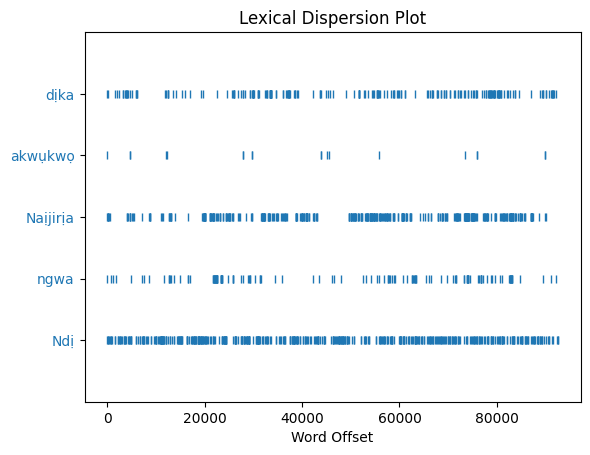

In [ ]:
#@title Dispersion Plot on some words in Akuko corpus
# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Create a Text object from the tokens
text_obj = Text(tokens)

# Generate the dispersion plot
text_obj.dispersion_plot(["Ndị", "ngwa", "Naịjirịa", "akwụkwọ", "dịka"])


In [ ]:
#@title Concordance Use
#A concordance view shows us every occurrence of a given word, together with some context.
# Load the text you want to generate a concordance for
text_words = Text(IGBO.words('bbc_news/akuko.txt'))

# Generate the concordance for the word "Ndị"
text_words.concordance('Ndị')


Displaying 25 of 2244 matches:
 Ndị na - ere ngwa nri akwaala arịrị njọah
teetị agbarụọla ihu n ' atụmatụ ụfọdụ ndị Ugwu chọrọ ichi ' Emir nke Aba '. Ọnụ
chọrọ ichi ' Emir nke Aba '. Ọnụọgụgụ ndị nwụrụ n ' ihe mberede ala ọma jijiji 
 ochie ma bido inye ego ọhụrụ , ọtụtụ ndị mmadụ nọ n ' ahụhu dịka ụkọ ego so ya
it at home , unknown gunmen nakwa ihe ndị ọzọ na - echegbu ọwụwa anyanwụ ugbua 
a ụlọikpe enyela iwu ka a tọhapụ ya . Ndị mmadụ na - akatọ Bishop Christian Ony
PDP zọọ ọkwa Gọvanọ Abia Steeti Ụfọdụ ndị ntoroọbịa Naịjirịa akọwaala ihe mere 
he n ' ọkwa Onyeisiala nwechara ebubo ndị e boro ha banyere akụnaụba ha . Dịka 
 n ' afọ 2021 bụ ISWA , Boko Haram na ndị Ipob . Ọtụtụ ego naịra adigboroja na 
titi wepụtara ego naịra ọhụrụ . Ọtụtụ ndị merụrụ ahụ n ' ogunigwe gbara na Kano
ụ abụọ siri hapụ ndụ ha na - ebi dịka ndị ụkọchukwu mgbe ha hụrụ onwe ha Lee ụf
chukwu mgbe ha hụrụ onwe ha Lee ụfọdụ ndị ọgbaa bọọlụ Afrịka nakwa nna ha gbakw
ọgba mbọ nke izu a . Chuks Ekwueme na ndị otu 

In [ ]:
#@title Collocations use
#A collocation is a sequence of words that occur together unusually often
text_words.collocations()

anaghị ahụta; Ebe foto; Usoro anyị; BBC anaghị; maka ọdịnaya; maka
njikọ; ahụta maka; nke saịtị; ọdịnaya nke; saịtị ndị; Nnamdi Kanu; ndị
mmadụ; anyị maka; soshal midia; Peter Obi; BBC Igbo; nke ọnwa; ndị
uweojii; Ọwụwa Anyanwụ; mba ụwa


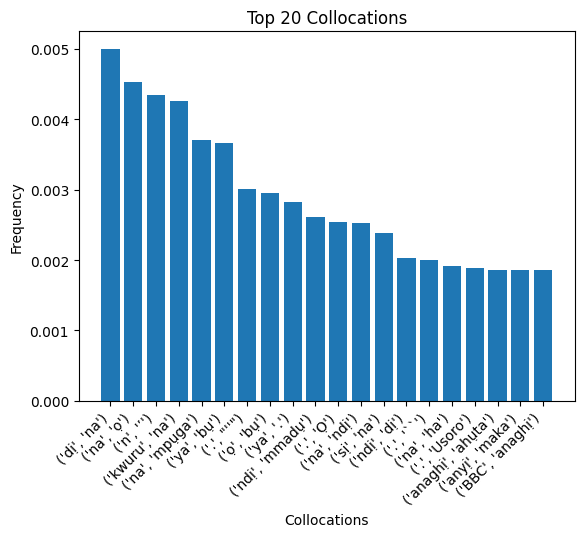

In [ ]:
# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Identify the collocations in the text
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)
collocations = finder.nbest(bigram_measures.raw_freq, 20)

# Calculate the frequency distribution of each collocation
collocation_freqs = []
for collocation in collocations:
    freq = FreqDist(nltk.bigrams(tokens)).freq(collocation)
    collocation_freqs.append(freq)

# Plot the collocation frequencies
plt.bar([str(collocation) for collocation in collocations], collocation_freqs)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Collocations')
plt.ylabel('Frequency')
plt.title('Top 20 Collocations')
plt.show()


In [ ]:
#@title Bigrams Use
# Load the corpus text 
bigram_text = text

# Generate a list of bigrams in the text
bigrams = list(ngrams(bigram_text.split(), 2))

# Count the frequency of each bigram
freq_dist = nltk.FreqDist(bigrams)

# Print the 10 most common bigrams
print(freq_dist.most_common(10))


[(('dị', 'na'), 464), (('na', 'ọ'), 419), (('kwuru', 'na'), 396), (('ya', 'bụ'), 340), (('ọ', 'bụ'), 270), (('na', 'ndị'), 235), (('ndị', 'mmadụ'), 222), (('sị', 'na'), 218), (('ndị', 'dị'), 189), (('na', 'ha'), 177)]


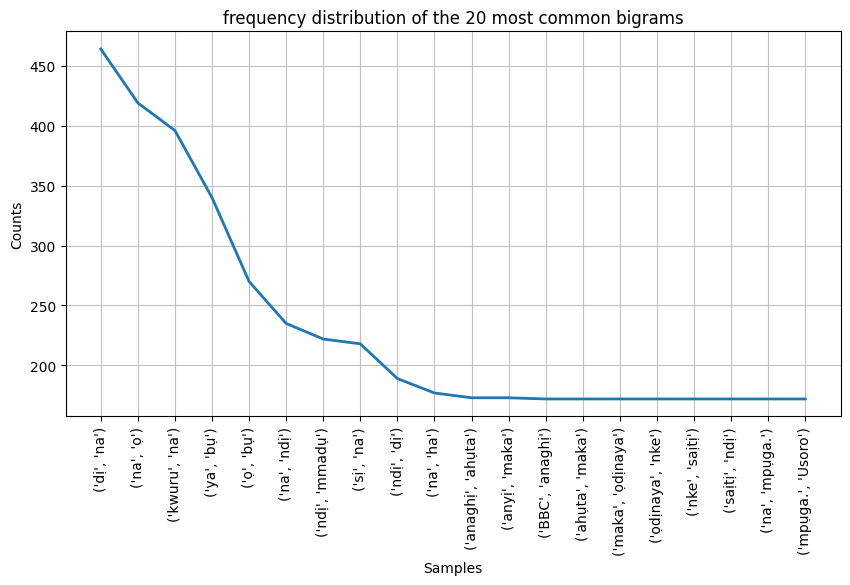

In [ ]:
# Plot the frequency distribution of the 20 most common bigrams
plt.figure(figsize=(10, 5))
plt.title('frequency distribution of the 20 most common bigrams')
freq_dist.plot(20)
plt.show()

In [ ]:
#@title some text analysis
#lexical diversity, A higher ratio of unique words to total words indicates that the text uses a greater variety of vocabulary, while a lower ratio indicates that the text uses a more limited vocabulary.
def lexical_diversity(text): 
  return (len(set(text)) /len(text))
  
#percentage of a word in a text
def percentage(count, total): 
  return(round((100 * count / total),2))

In [ ]:
#@title Lexical Diversity and Percentage of a word ndị in the text
print("Lexical Diversity: ",lexical_diversity(text))
print("Percentage the word - ndị - is in the text: ",percentage(text.count('ndị'), len(text)),"%")


Lexical Diversity:  0.0002481623904406969
Percentage the word - ndị - is in the text:  0.46 %


In [ ]:
#@title most frequent tokens
tokens = nltk.word_tokenize(text)
fdist1 = FreqDist(tokens)
fdist1

FreqDist({'na': 4319, '.': 3555, ',': 2677, 'ya': 2371, 'ndị': 2032, 'bụ': 1886, 'ha': 1485, 'nke': 1428, 'a': 1345, 'ọ': 1250, ...})

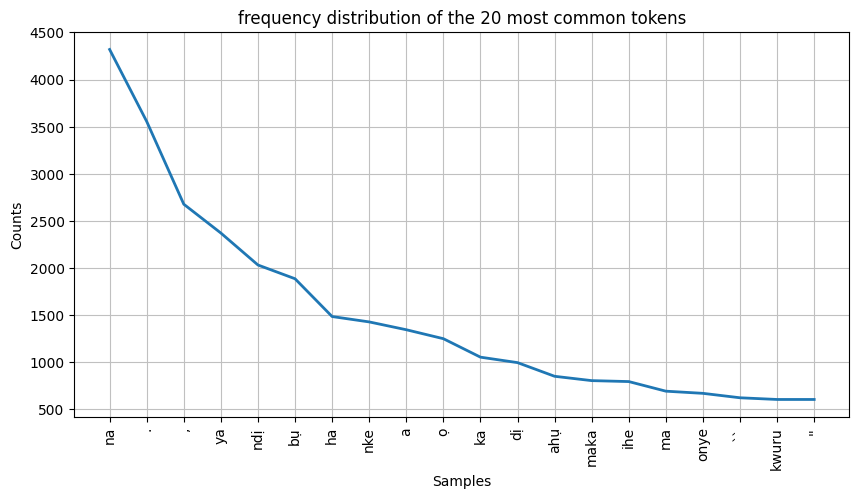

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('frequency distribution of the 20 most common tokens')
fdist1.plot(20)
plt.show()